# Dataset Description


This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:
<table>
<tr>
<td>
<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"alt="Fashion MNIST sprite" width="600"></td></tr><tr><td align="center"><b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;</td></tr></table>Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.This guide uses Fashion MNIST for variety, and because it's a slightly more challenging

## Load Tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

## Collect Data

In [ ]:
(train_images, train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
np.set_printoptions(linewidth=200)
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

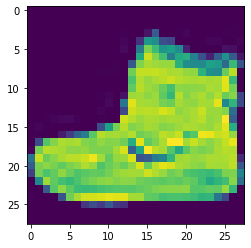

In [ ]:
plt.imshow(train_images[0])

## Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255: 

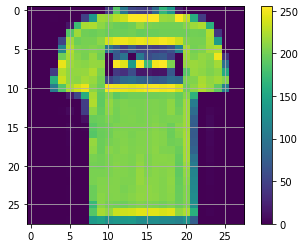

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
train_labels[1]

0

## Normalize the data using Min-max normalization
Scale these values to a range 0 to 1 before feeding them to neural network model. To do so, divide the values by 255. Its important that the training set and the testing set to be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
## (value - min)/(max - min), here max is 255 and min is 0 hence divide by 255

To verify the data is in the correct format and that you are ready to build and train the network, lets display the 1st 25 images from the training set and display the class name below each image

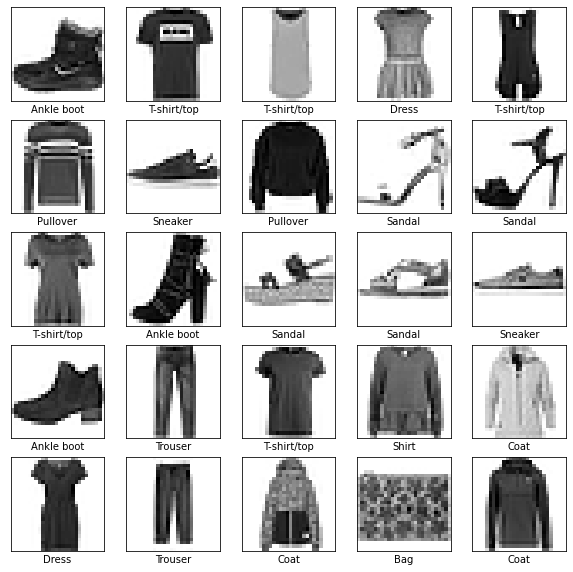

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model
Building the NN requires configuring the layers of the model, then compiling the model

## Set up the layers
Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of the deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training

In [ ]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

The 1st layer in this network, tf.keras.layers.Flatten transforms the format of the images from a 2-D array (of 28 by 28 pixels) to a 1-D array (of 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data

After the pixels are flattened, the network consists of a sequence of 2 tf.keras.layers.Dense layers. These are densely connected, or fully connected, NN layers. The first layer has 128 nodes (or neurons). The 2nd (and last) layer returns a logits array with length of 10.

Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- Loss function - This measures how accurate the model is during training. You want to minimize this function to 'steer' the model in the right direction.
- Optimizer - This is how the model is updated based on the data it sees and its loss function.
- Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# when one-hot encoded use categorical_crossentropy
# when no one-hot use sparse_categorical_crossentropy

## Train the model

Training the NN model requires the foll steps:
- Feed the training data to the model. In this exmaple, the training data is in the train_images and train_labels arrays.
- The model learns to associate images and labels
- You ask the model to make predictions about a test set - in this example the test_images array
-Verify that the predictions match the labels from the test_labels array

## Feed the model

To start training, call the model.fit method- so called because it fits the model to the training data:

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3759 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2927 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2654 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2551 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 on the training data.

## Evaluate the accuracy
Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3203 - accuracy: 0.8874

Test accuracy: 0.8873999714851379


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a ML model performs worse on the new, previously unseen inputs than it does on the train data. An overfitted model 'memorizes' the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data

## Make predictions
With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# without adding softmax layer predictions result in negative values through which we cannot predict the classes

In [ ]:
predictions = probability_model.predict(test_images)
#predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set.

In [ ]:
predictions[0]

array([7.7460140e-07, 2.2197953e-07, 3.8254964e-09, 6.8257296e-11, 8.0109608e-09, 9.7581669e-04, 7.5645286e-09, 2.4979897e-02, 3.3004476e-08, 9.7404331e-01], dtype=float32)

In [ ]:
predictions[0].argsort()[::-1] #get the index which has highest prob value

array([9, 7, 5, 0, 1, 8, 4, 6, 2, 3])

A prediction is an array of 10 numbers. They represent the model's confidence that the image corresponds to each of the 10 differrent articles of clothing. You can see which label has highest confidence value:

Graph this to look at the full set of 10 class predictions

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
      
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions
With the model trained, you can use it to make predictions about some images.

Lets look at 0th image, predictions and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage for the predicted label

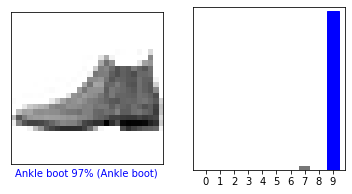

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

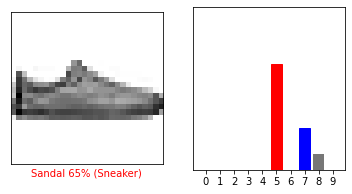

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

Lets plot several images with their predictions, Note that the model can wrong even when very confident

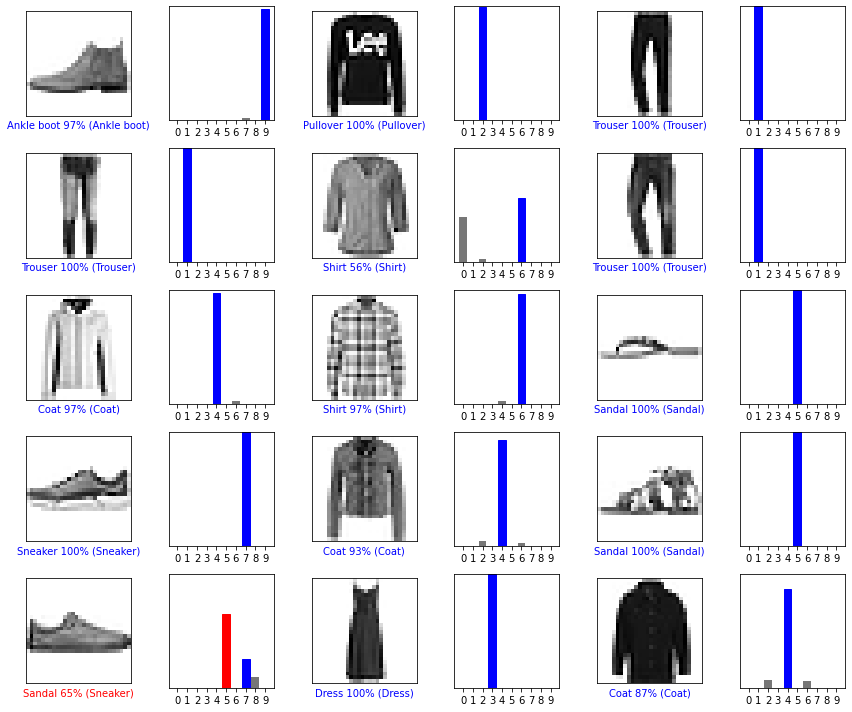

In [ ]:
# Plot the 1st X test images, their predicted labels and the true labels
# color correct prediction in blue and incorrect prediction in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimised to make predictions on a batch or collection of examples at once. Accordingly even though you're using a single image you need to add it to a list

In [ ]:
# Add the image to a batch where its the only member
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


Now predict the correct label for this image

In [ ]:
prediction_single = probability_model.predict(img)
print(prediction_single)

[[8.1003840e-05 2.2248228e-14 9.9813253e-01 1.1502841e-11 1.3842155e-03 4.3836157e-09 4.0218982e-04 4.2807029e-14 4.3581636e-09 8.8953418e-15]]


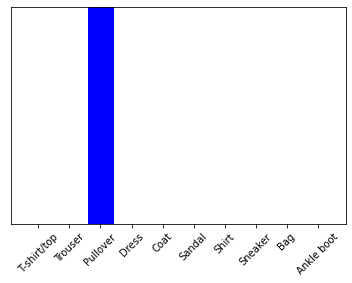

In [ ]:
plot_value_array(1,prediction_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

keras.Model.predict returns a list of lists- one list for each image in the batch of data. Grab the predictions for our image in the batch

In [ ]:
np.argmax(prediction_single[0])

2

And the model predicts a label as expected

# Using callbacks to control training
- When we want to stop the training after reaching certain accuracy value, we write a call back function with a condition to check the accuracy.
- Here, at the end of every epoch, we check whether required accuracy is reached or not.
- If the accuracy is reached, we will stop there, and next epoch will not be executed.
- If required accuracy is not reached, then the model will continue with next epoch.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print('\nReached 95% accuracy so cancelling training')
      self.model.stop_training = True

callbacks = myCallback()

model.fit(train_images,train_labels,epochs=200,callbacks=[callbacks])

Epoch 1/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2217 - accuracy: 0.9162
Epoch 2/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2144 - accuracy: 0.9200
Epoch 3/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2075 - accuracy: 0.9227
Epoch 4/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2032 - accuracy: 0.9229
Epoch 5/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1961 - accuracy: 0.9256
Epoch 6/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1901 - accuracy: 0.9292
Epoch 7/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1874 - accuracy: 0.9300
Epoch 8/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1813 - accuracy: 0.9311
Epoch 9/200
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1757 - accuracy: 0.9337
Epoch 10/200
1875/1875 [==============================] - 3s 2ms/step - l